In [1]:
import pandas as pd
import numpy as np
import csv
import ast
import matplotlib.pyplot as plt
import bct

In [2]:
gs_csv = "gs_outputs/gs_authorlist_publications_notitles.csv"
scival_csv = "scival_outputs/scival_authorlist_publications_official.csv"

In [3]:
gs_df = pd.read_csv(gs_csv)
scival_df = pd.read_csv(scival_csv)

In [4]:
print(gs_df.head)
print(scival_df.head)

<bound method NDFrame.head of                             Name    Scholar ID  Document Count  Cited by  \
0                  Tim H. Murphy  qJjM8hkAAAAJ             239     21139   
1            Annie Vogel Ciernia  XAGfOIIAAAAJ              44      1964   
2                 Brian MacVicar  Sx3420cAAAAJ             217     22082   
3           Fidel Vila-Rodriguez  VynxFpEAAAAJ             263      5626   
4                  Shernaz Bamji  C832lNEAAAAJ              59      5306   
5                      Lara Boyd  yutn3mwAAAAJ             356     15074   
6                  Paul Pavlidis  ataejQQAAAAJ             245     17627   
7              Martin J. McKeown  cBAT2tQAAAAJ             369     16443   
8   A Jon Stoessl OR jon Stoessl  KnhWIqwAAAAJ             449     30713   
9                  Peter Cripton  hm6fJTkAAAAJ             284      7678   
10               Jason S. Snyder  B6Fe4-4AAAAJ              39      6034   
11              Wolfram Tetzlaff  HgUvr-IAAAAJ            

In [5]:
def get_coauthor_matrix(df):
    names = df.loc[:,"Name"]
    coauthor_matrix = np.zeros((names.size, names.size))

    for idx, author in df.iterrows():
        auth_name = author["Name"]
        row = names[names == auth_name].index[0]
        try:
            coauthors = ast.literal_eval(author["Coauthors"]) #get coauthors
            if len(coauthors) == 0: print(auth_name, "has no coauthors")
            for coauthor in coauthors.keys():
                num_publications = coauthors[coauthor]
                col = names[names == coauthor].index[0]
                coauthor_matrix[col][row] += num_publications

        except:
            print(auth_name, "has no coauthors")
    
    print("\n")
    return coauthor_matrix

In [6]:
scival_coauthor_matrix = get_coauthor_matrix(scival_df)
gs_coauthor_matrix = get_coauthor_matrix(gs_df)     



Annie Vogel-Ciernia has no coauthors
Mark S. Cembrowski has no coauthors
Michael J. Gordon has no coauthors
Manu S. Madhav has no coauthors
Brian D. Fisher has no coauthors
Emily Lauren Sylwestrak has no coauthors


Michael Gordon has no coauthors
Manu S Madhav has no coauthors
Emily Sylwestrak has no coauthors




In [7]:
print(scival_coauthor_matrix)
print(gs_coauthor_matrix)

print(type(scival_coauthor_matrix))
print(scival_coauthor_matrix.shape)

# scival_2dlist = scival_coauthor_matrix.tolist()
# print(type(scival_2dlist))

[[0. 0. 2. ... 0. 9. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 3. ... 0. 9. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [3. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>
(41, 41)


In [29]:
# plt.matshow(scival_coauthor_matrix,cmap="Wistia",norm="linear")
# plt.matshow(gs_coauthor_matrix,cmap="Wistia",norm="linear")
def graph_matrix(df, title):
    coauthor_matrix = get_coauthor_matrix(df)
    names=scival_df["Name"].to_list()

    fig, ax = plt.subplots()
    im = ax.imshow(coauthor_matrix, cmap="YlOrRd")

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(names)), labels=names, fontsize="xx-small")
    ax.set_yticks(np.arange(len(names)), labels=names, fontsize="xx-small")

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(names)):
        for j in range(len(names)):
            text = ax.text(j, i, int(coauthor_matrix[i, j]),
                        ha="center", va="center", color="black")

    ax.set_title(title)
    fig.tight_layout()
    fig.set_size_inches(10, 10)
    plt.show()

Annie Vogel-Ciernia has no coauthors
Mark S. Cembrowski has no coauthors
Michael J. Gordon has no coauthors
Manu S. Madhav has no coauthors
Brian D. Fisher has no coauthors
Emily Lauren Sylwestrak has no coauthors




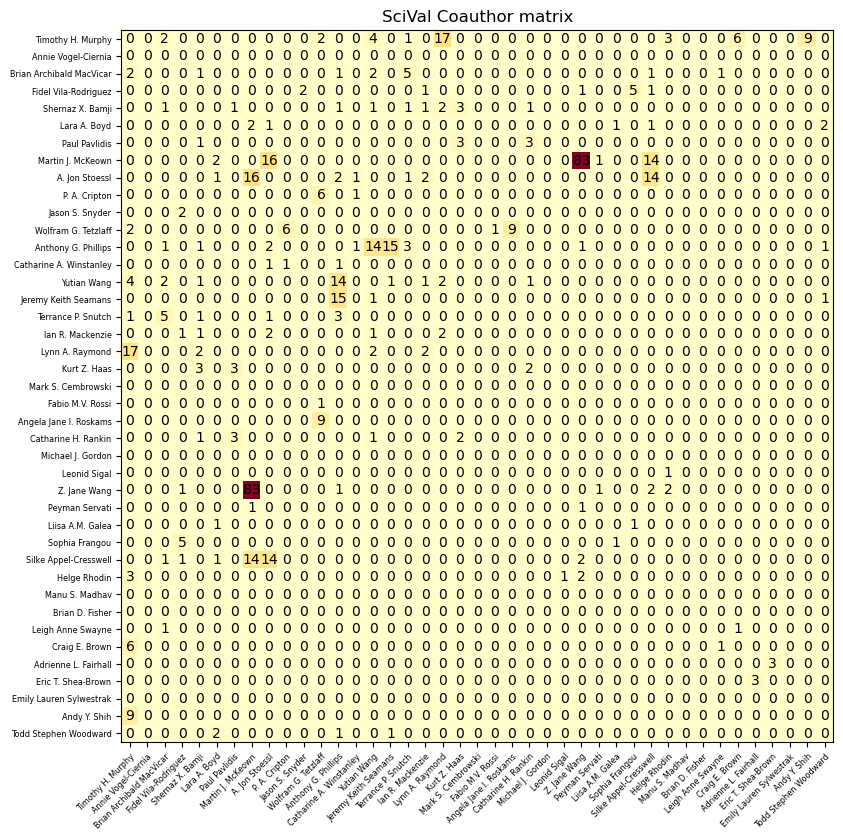

In [30]:
graph_matrix(scival_df, "SciVal Coauthor matrix")

In [8]:
scival_centrality = bct.betweenness_bin(scival_coauthor_matrix)
scival_centrality_normed = scival_centrality/((len(scival_coauthor_matrix)-1)*(len(scival_coauthor_matrix)-2))

['Timothy H. Murphy', 'Annie Vogel-Ciernia', 'Brian Archibald MacVicar', 'Fidel Vila-Rodriguez', 'Shernaz X. Bamji', 'Lara A. Boyd', 'Paul Pavlidis', 'Martin J. McKeown', 'A. Jon Stoessl', 'P. A. Cripton', 'Jason S. Snyder', 'Wolfram G. Tetzlaff', 'Anthony G. Phillips', 'Catharine A. Winstanley', 'Yutian Wang', 'Jeremy Keith Seamans', 'Terrance P. Snutch', 'Ian R. Mackenzie', 'Lynn A. Raymond', 'Kurt Z. Haas', 'Mark S. Cembrowski', 'Fabio M.V. Rossi', 'Angela Jane I. Roskams', 'Catharine H. Rankin', 'Michael J. Gordon', 'Leonid Sigal', 'Z. Jane Wang', 'Peyman Servati', 'Liisa A.M. Galea', 'Sophia Frangou', 'Silke Appel-Cresswell', 'Helge Rhodin', 'Manu S. Madhav', 'Brian D. Fisher', 'Leigh Anne Swayne', 'Craig E. Brown', 'Adrienne L. Fairhall', 'Eric T. Shea-Brown', 'Emily Lauren Sylwestrak', 'Andy Y. Shih', 'Todd Stephen Woodward']


([<matplotlib.axis.XTick at 0x215d0907220>,
 [Text(0, 0, 'Timothy H. Murphy'),
  Text(1, 0, 'Annie Vogel-Ciernia'),
  Text(2, 0, 'Brian Archibald MacVicar'),
  Text(3, 0, 'Fidel Vila-Rodriguez'),
  Text(4, 0, 'Shernaz X. Bamji'),
  Text(5, 0, 'Lara A. Boyd'),
  Text(6, 0, 'Paul Pavlidis'),
  Text(7, 0, 'Martin J. McKeown'),
  Text(8, 0, 'A. Jon Stoessl'),
  Text(9, 0, 'P. A. Cripton'),
  Text(10, 0, 'Jason S. Snyder'),
  Text(11, 0, 'Wolfram G. Tetzlaff'),
  Text(12, 0, 'Anthony G. Phillips'),
  Text(13, 0, 'Catharine A. Winstanley'),
  Text(14, 0, 'Yutian Wang'),
  Text(15, 0, 'Jeremy Keith Seamans'),
  Text(16, 0, 'Terrance P. Snutch'),
  Text(17, 0, 'Ian R. Mackenzie'),
  Text(18, 0, 'Lynn A. Raymond'),
  Text(19, 0, 'Kurt Z. Haas'),
  Text(20, 0, 'Mark S. Cembrowski'),
  Text(21, 0, 'Fabio M.V. Rossi'),
  Text(22, 0, 'Angela Jane I. Roskams'),
  Text(23, 0, 'Catharine H. Rankin'),
  Text(24, 0, 'Michael J. Gordon'),
  Text(25, 0, 'Leonid Sigal'),
  Text(26, 0, 'Z. Jane Wang'),
  Te

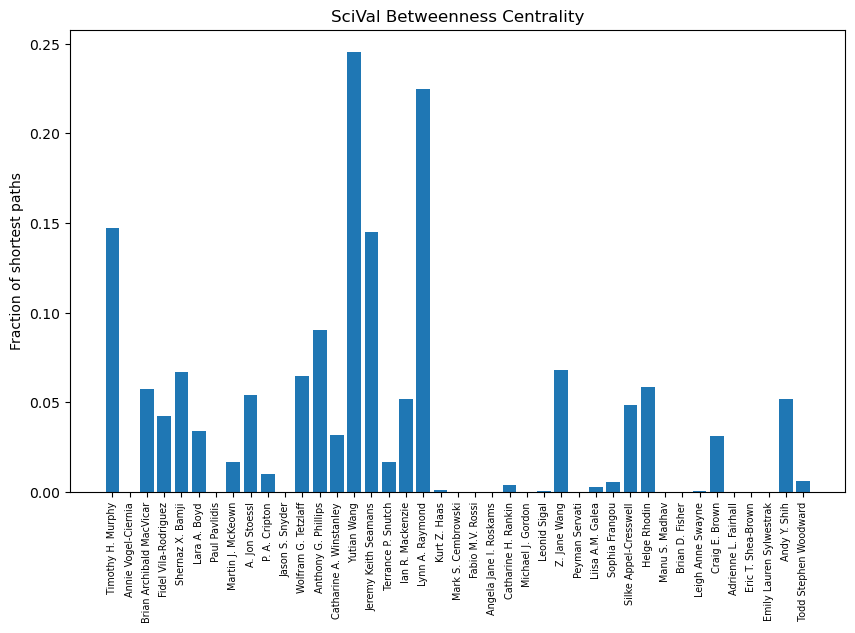

In [9]:
plt.figure(figsize=(10,6))
names = scival_df["Name"].to_list()
print(names)
plt.bar(names, scival_centrality_normed)
plt.title("SciVal Betweenness Centrality")
plt.ylabel("Fraction of shortest paths")
plt.xticks(range(41), labels=names, rotation=90, fontsize='x-small')

In [10]:
gs_centrality = bct.betweenness_bin(gs_coauthor_matrix)
gs_centrality_normed = gs_centrality/((len(gs_coauthor_matrix)-1)*(len(gs_coauthor_matrix)-2))

scival_centrality = bct.betweenness_bin(scival_coauthor_matrix)
scival_centrality_normed = scival_centrality/((len(scival_coauthor_matrix)-1)*(len(scival_coauthor_matrix)-2))

([<matplotlib.axis.XTick at 0x215d14691e0>,
 [Text(0, 0, 'Timothy H. Murphy'),
  Text(1, 0, 'Annie Vogel-Ciernia'),
  Text(2, 0, 'Brian Archibald MacVicar'),
  Text(3, 0, 'Fidel Vila-Rodriguez'),
  Text(4, 0, 'Shernaz X. Bamji'),
  Text(5, 0, 'Lara A. Boyd'),
  Text(6, 0, 'Paul Pavlidis'),
  Text(7, 0, 'Martin J. McKeown'),
  Text(8, 0, 'A. Jon Stoessl'),
  Text(9, 0, 'P. A. Cripton'),
  Text(10, 0, 'Jason S. Snyder'),
  Text(11, 0, 'Wolfram G. Tetzlaff'),
  Text(12, 0, 'Anthony G. Phillips'),
  Text(13, 0, 'Catharine A. Winstanley'),
  Text(14, 0, 'Yutian Wang'),
  Text(15, 0, 'Jeremy Keith Seamans'),
  Text(16, 0, 'Terrance P. Snutch'),
  Text(17, 0, 'Ian R. Mackenzie'),
  Text(18, 0, 'Lynn A. Raymond'),
  Text(19, 0, 'Kurt Z. Haas'),
  Text(20, 0, 'Mark S. Cembrowski'),
  Text(21, 0, 'Fabio M.V. Rossi'),
  Text(22, 0, 'Angela Jane I. Roskams'),
  Text(23, 0, 'Catharine H. Rankin'),
  Text(24, 0, 'Michael J. Gordon'),
  Text(25, 0, 'Leonid Sigal'),
  Text(26, 0, 'Z. Jane Wang'),
  Te

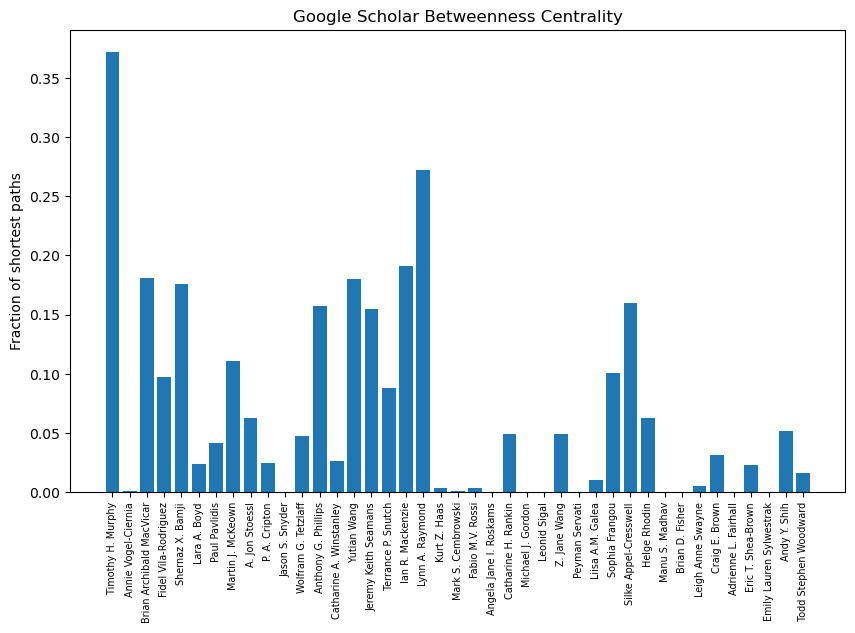

In [11]:
plt.figure(figsize=(10,6))
gs_names = gs_df["Name"].to_list()
plt.bar(names, gs_centrality_normed)
plt.title("Google Scholar Betweenness Centrality")
plt.ylabel("Fraction of shortest paths")
plt.xticks(range(41), labels=names, rotation=90, fontsize='x-small')

In [12]:
centrality_df = pd.DataFrame({
    "Name":names,
    "SciVal":scival_centrality_normed,
    "Google Scholar":gs_centrality_normed,
})

ordered_df = centrality_df.sort_values(by="Google Scholar", ascending=True)
print(ordered_df.head)

<bound method NDFrame.head of                         Name    SciVal  Google Scholar
38   Emily Lauren Sylwestrak  0.000000        0.000000
36      Adrienne L. Fairhall  0.000000        0.000000
33           Brian D. Fisher  0.000000        0.000000
32            Manu S. Madhav  0.000000        0.000000
27            Peyman Servati  0.000000        0.000000
25              Leonid Sigal  0.000641        0.000000
10           Jason S. Snyder  0.000000        0.000000
24         Michael J. Gordon  0.000000        0.000000
22    Angela Jane I. Roskams  0.000000        0.000000
20        Mark S. Cembrowski  0.000000        0.000641
1        Annie Vogel-Ciernia  0.000000        0.001122
21          Fabio M.V. Rossi  0.000000        0.003149
19              Kurt Z. Haas  0.001282        0.003205
34         Leigh Anne Swayne  0.000375        0.004969
28          Liisa A.M. Galea  0.002656        0.010240
40     Todd Stephen Woodward  0.006328        0.016483
37        Eric T. Shea-Brown  0.000

[0.14752187 0.         0.0572786  0.04227876 0.06681706 0.03411109
 0.         0.01700733 0.05421391 0.00998974 0.         0.06477299
 0.09010204 0.03187768 0.24538407 0.14514095 0.01652419 0.05172476
 0.224741   0.00128205 0.         0.         0.         0.00404233
 0.         0.00064103 0.06778179 0.         0.00265646 0.00560096
 0.04834996 0.05881003 0.         0.         0.00037531 0.03119946
 0.         0.         0.         0.05192308 0.00632792]
[0.37193611 0.00112179 0.18080653 0.09686716 0.17566863 0.02363515
 0.04129926 0.11103797 0.062802   0.02444516 0.         0.04736497
 0.15707776 0.02642844 0.17969921 0.15481393 0.08812085 0.19125231
 0.27179058 0.00320513 0.00064103 0.00314946 0.         0.04890186
 0.         0.         0.04877244 0.         0.01023951 0.10066136
 0.15987659 0.06287958 0.         0.         0.00496933 0.03141277
 0.         0.02307692 0.         0.05192308 0.0164829 ]


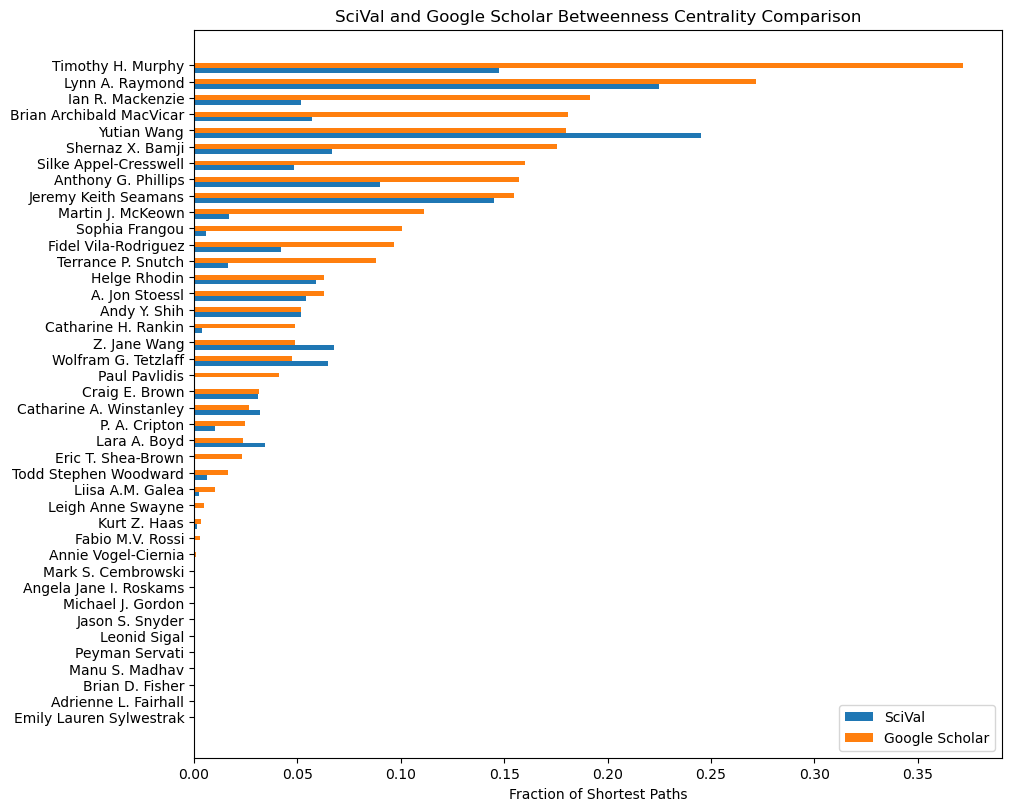

In [13]:
species = ordered_df["Name"].to_list()
penguin_means = {
    'SciVal': ordered_df["SciVal"].to_list(),
    'Google Scholar': ordered_df["Google Scholar"].to_list(),
}

print(scival_centrality_normed)
print(gs_centrality_normed)

x = np.arange(len(species))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(10, 8)
plt.title("Google Scholar Betweenness Centrality")

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    # if attribute=="Scival":
    #     ax.bar_label(rects, padding=3, color = "blue")
    # elif attribute=="Google Scholar":
    #     ax.bar_label(rects, padding=3, color = "orange")
    multiplier += 1

ax.set_xlabel("Fraction of Shortest Paths")
ax.set_title('SciVal and Google Scholar Betweenness Centrality Comparison')
ax.set_yticks(x + width, labels=species)
ax.legend(loc='lower right')